In [2]:
import numpy as np
from scipy.sparse import diags
from scipy.stats import norm
from IPython import display
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 15

Define ODE as heat equation:

$u_t = u_{x,x}$

on a grid of $N$ spatial points with boundary conditions of $u(0,t)=u(N,t)=0$.

Define finite difference stencil with space discretised as $\left[j, j+1, ... \right]$ and time discretised as $\left[n, n+1, ... \right]$:

$\dfrac{v_j^{n+1}-v_j^n}{k}=\dfrac{v_{j+1}^n-2v_{j}^n+v_{j-1}^n}{h^2}$

The spatial grid spacing is $h$ and the temporal grid spacing is $k$

Stencil can be recast as a matrix multiplication involving a tridiagonal matrix with $a$ on the leading diagonal and $b$ on both the adjacent diagonals

In [3]:
# Define constants

N = 30  # Number of space steps in the grid
T = 100  # Number of steps in time to take
x = np.linspace(-3, 3, N)  # Spatial axis
v = norm.pdf(x)  # Define vector describing the initial state at time n = 0
h = 1/40  # Step size in space
k = 0.5*h**2  # Time step

a = 1 - 2*k/h**2  # Leading diagonal
b = k/h**2  # Super/Sub diagonal

# Stencil matrix
diagonals = [[a]*N, [b]*(N-1), [b]*(N-1)]
A = diags(diagonals, [0, -1, 1]).toarray()

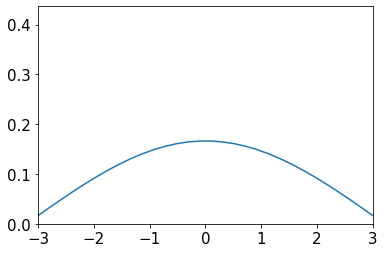

In [4]:
# Loop and plot the newly calculated state at each time increment

# Reinitialise the first state
v = norm.pdf(np.linspace(-3, 3, N))
ymax = np.max(v)

for time in range(T):
    v = np.matmul(A, v)

    plt.plot(x, v)
    plt.axis([x[0], x[-1], 0, 1.1*ymax])
    display.clear_output(wait=True)
    #display.display(plt.gcf())
    plt.pause(0.01)